In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv("CC GENERAL.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
import plotly 
import plotly.express as px
import cufflinks as cf
cf.go_offline()

In [7]:
#We can see that most are very minimal accounts and balance is restricted under 1000
#Implying people dont use the savings that much /have less money to save 
df["BALANCE"].iplot(kind="hist")

In [8]:
#As similar to balance the data is "LEFT HAND PRECIPICE" 
#Although we can see it has much more outliers then balance and very high purchases as well
df["PURCHASES"].iplot(kind="hist")

In [9]:
#We can see PURCHASE freq is highly spread over the BALANCE freq is not so much  
df.describe().loc[:,["BALANCE_FREQUENCY","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY"]]

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count        8950.000000          8950.000000                 8950.000000   
mean            0.877271             0.490351                    0.202458   
std             0.236904             0.401371                    0.298336   
min             0.000000             0.000000                    0.000000   
25%             0.888889             0.083333                    0.000000   
50%             1.000000             0.500000                    0.083333   
75%             1.000000             0.916667                    0.300000   
max             1.000000             1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  
count                       8950.000000  
mean                           0.364437  
std                            0.397448  
min                            0.000000  
25%                            0.000000  
50%                            0.166667  
75%                            0.750000  
max                            1.000000

In [10]:
df["TENURE"].value_counts()
df["CREDIT_LIMIT"].value_counts()

3000.0    784
1500.0    722
1200.0    621
1000.0    614
2500.0    612
         ... 
50.0        1
9700.0      1
6850.0      1
5450.0      1
3650.0      1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [11]:
df["CREDIT_LIMIT"].iplot(kind="box",colors="blue")

In [12]:
#WE can clearly see that Tenure is having drastic effects on purchases 
# THis is justified as the longer the customer stays the more he uses the services 
px.box(df,x="TENURE", y="PURCHASES")

In [13]:
df["PAYMENTS"].iplot(kind="hist")

In [14]:
#TENURE IS AFFECTING PAYMENTS AS WELL
#Although this time it is more subtle because we know that TENURE==12 is hgih in numbers implying the outliers 
px.box(df,x="TENURE", y="PAYMENTS")

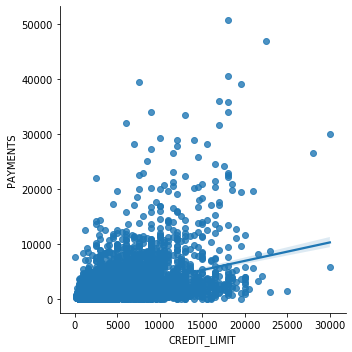

In [15]:
#Highly focused data due to the large numbers of poeple having less payments and thus less credit limit(due to balance etc)
sns.lmplot(x="CREDIT_LIMIT",y="PAYMENTS",data=df)

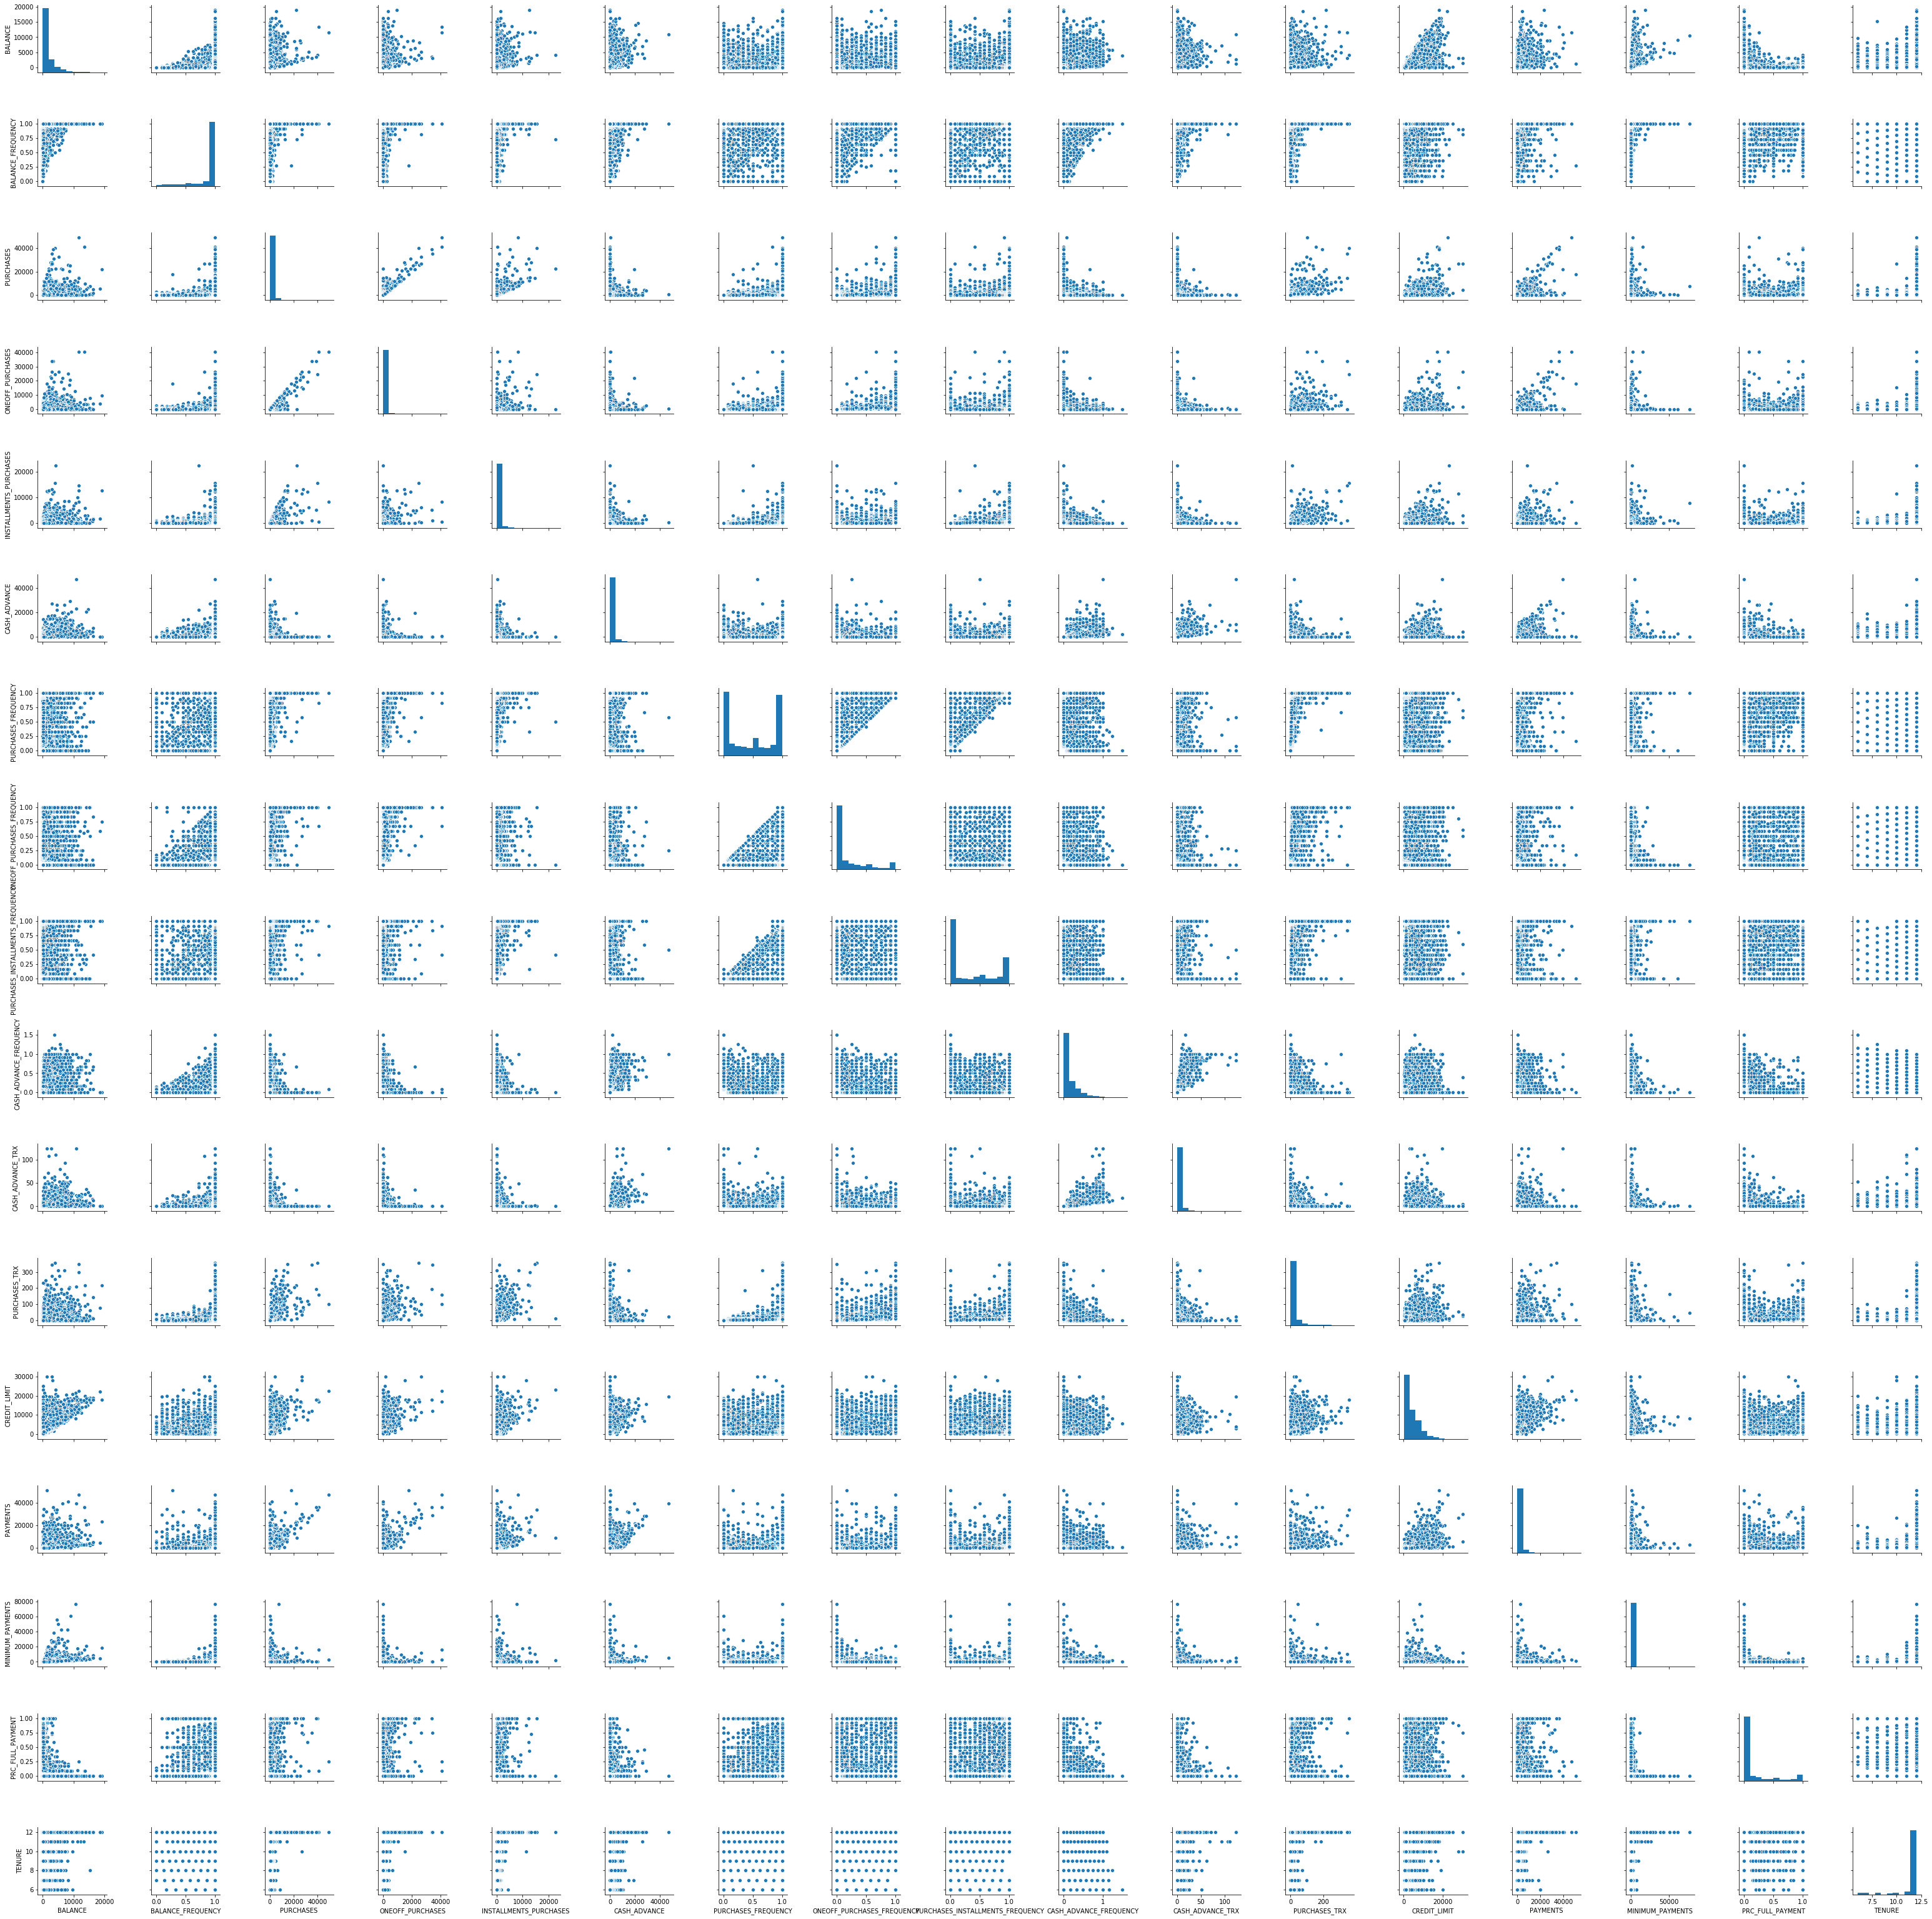

In [16]:
sns.pairplot(df)

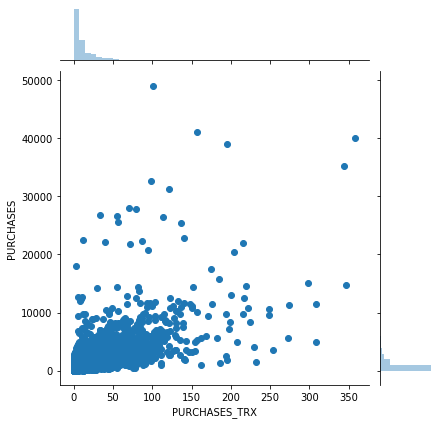

In [17]:
#Although the data is still very leftly skewed but we can see that 3-4 Cluster can be formed 
#(high,low)* [purchase;purchases_trx;]
sns.jointplot(x="PURCHASES_TRX",y="PURCHASES",data=df)

In [18]:
df.isnull().sum().sort_values(ascending=False)[:3]

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
TENURE                0
dtype: int64

In [19]:
df[df["CREDIT_LIMIT"].isnull()==True]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [20]:
#CREDIT_LIMIT mean=3521.575342
#So rather than filling it with overall mean we used certain conditions 
#This approach can be performed for very few missing entries 
df["CREDIT_LIMIT"].fillna(value=3500,inplace=True)
df[(df["BALANCE"]<50) & (df["BALANCE_FREQUENCY"]<0.23)].mean()

BALANCE                                6.412246
BALANCE_FREQUENCY                      0.108207
PURCHASES                            205.236485
ONEOFF_PURCHASES                      87.259693
INSTALLMENTS_PURCHASES               117.976792
CASH_ADVANCE                         113.089997
PURCHASES_FREQUENCY                    0.284487
ONEOFF_PURCHASES_FREQUENCY             0.044526
PURCHASES_INSTALLMENTS_FREQUENCY       0.241334
CASH_ADVANCE_FREQUENCY                 0.020650
CASH_ADVANCE_TRX                       0.303754
PURCHASES_TRX                          4.058020
CREDIT_LIMIT                        3521.501706
PAYMENTS                             805.056486
MINIMUM_PAYMENTS                      70.508017
PRC_FULL_PAYMENT                       0.091755
TENURE                                11.385666
dtype: float64

In [21]:
df['CREDIT_LIMIT'].mean()

4494.33833869419

In [22]:
df.isnull().sum().sort_values(ascending=False)[:3]

MINIMUM_PAYMENTS       313
TENURE                   0
PURCHASES_FREQUENCY      0
dtype: int64

In [23]:
"""
Data is highly imbalanced and skewed towards extreme right/left
Thus we need to create a certain bounds to work iwth outliers and scale the data up 
"""

'\nData is highly imbalanced and skewed towards extreme right/left\nThus we need to create a certain bounds to work iwth outliers and scale the data up \n'

In [25]:
df.fillna(method="ffill",inplace=True)

In [32]:
df.drop(["CUST_ID"],axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()

In [34]:
scaled_df=scaler.fit_transform(df)

In [36]:
scaled_df

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [37]:
from sklearn.cluster import KMeans

In [41]:
sse=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=500).fit(scaled_df)
    sse.append(kmeans.inertia_)

In [42]:
sse

[5935.732275754402,
 3508.4818016552977,
 2927.9207875270563,
 2551.96981691142,
 2263.071267568963,
 2054.9609381388454,
 1858.2671150572787,
 1700.3843420579256]

In [74]:
px.line(x=np.arange(1,9),y=sse)

In [53]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
y_pred=kmeans.fit_predict(scaled_df)

In [56]:
y_pred

array([0, 0, 2, ..., 1, 0, 2])

In [58]:
df["Cluster"]=y_pred+1

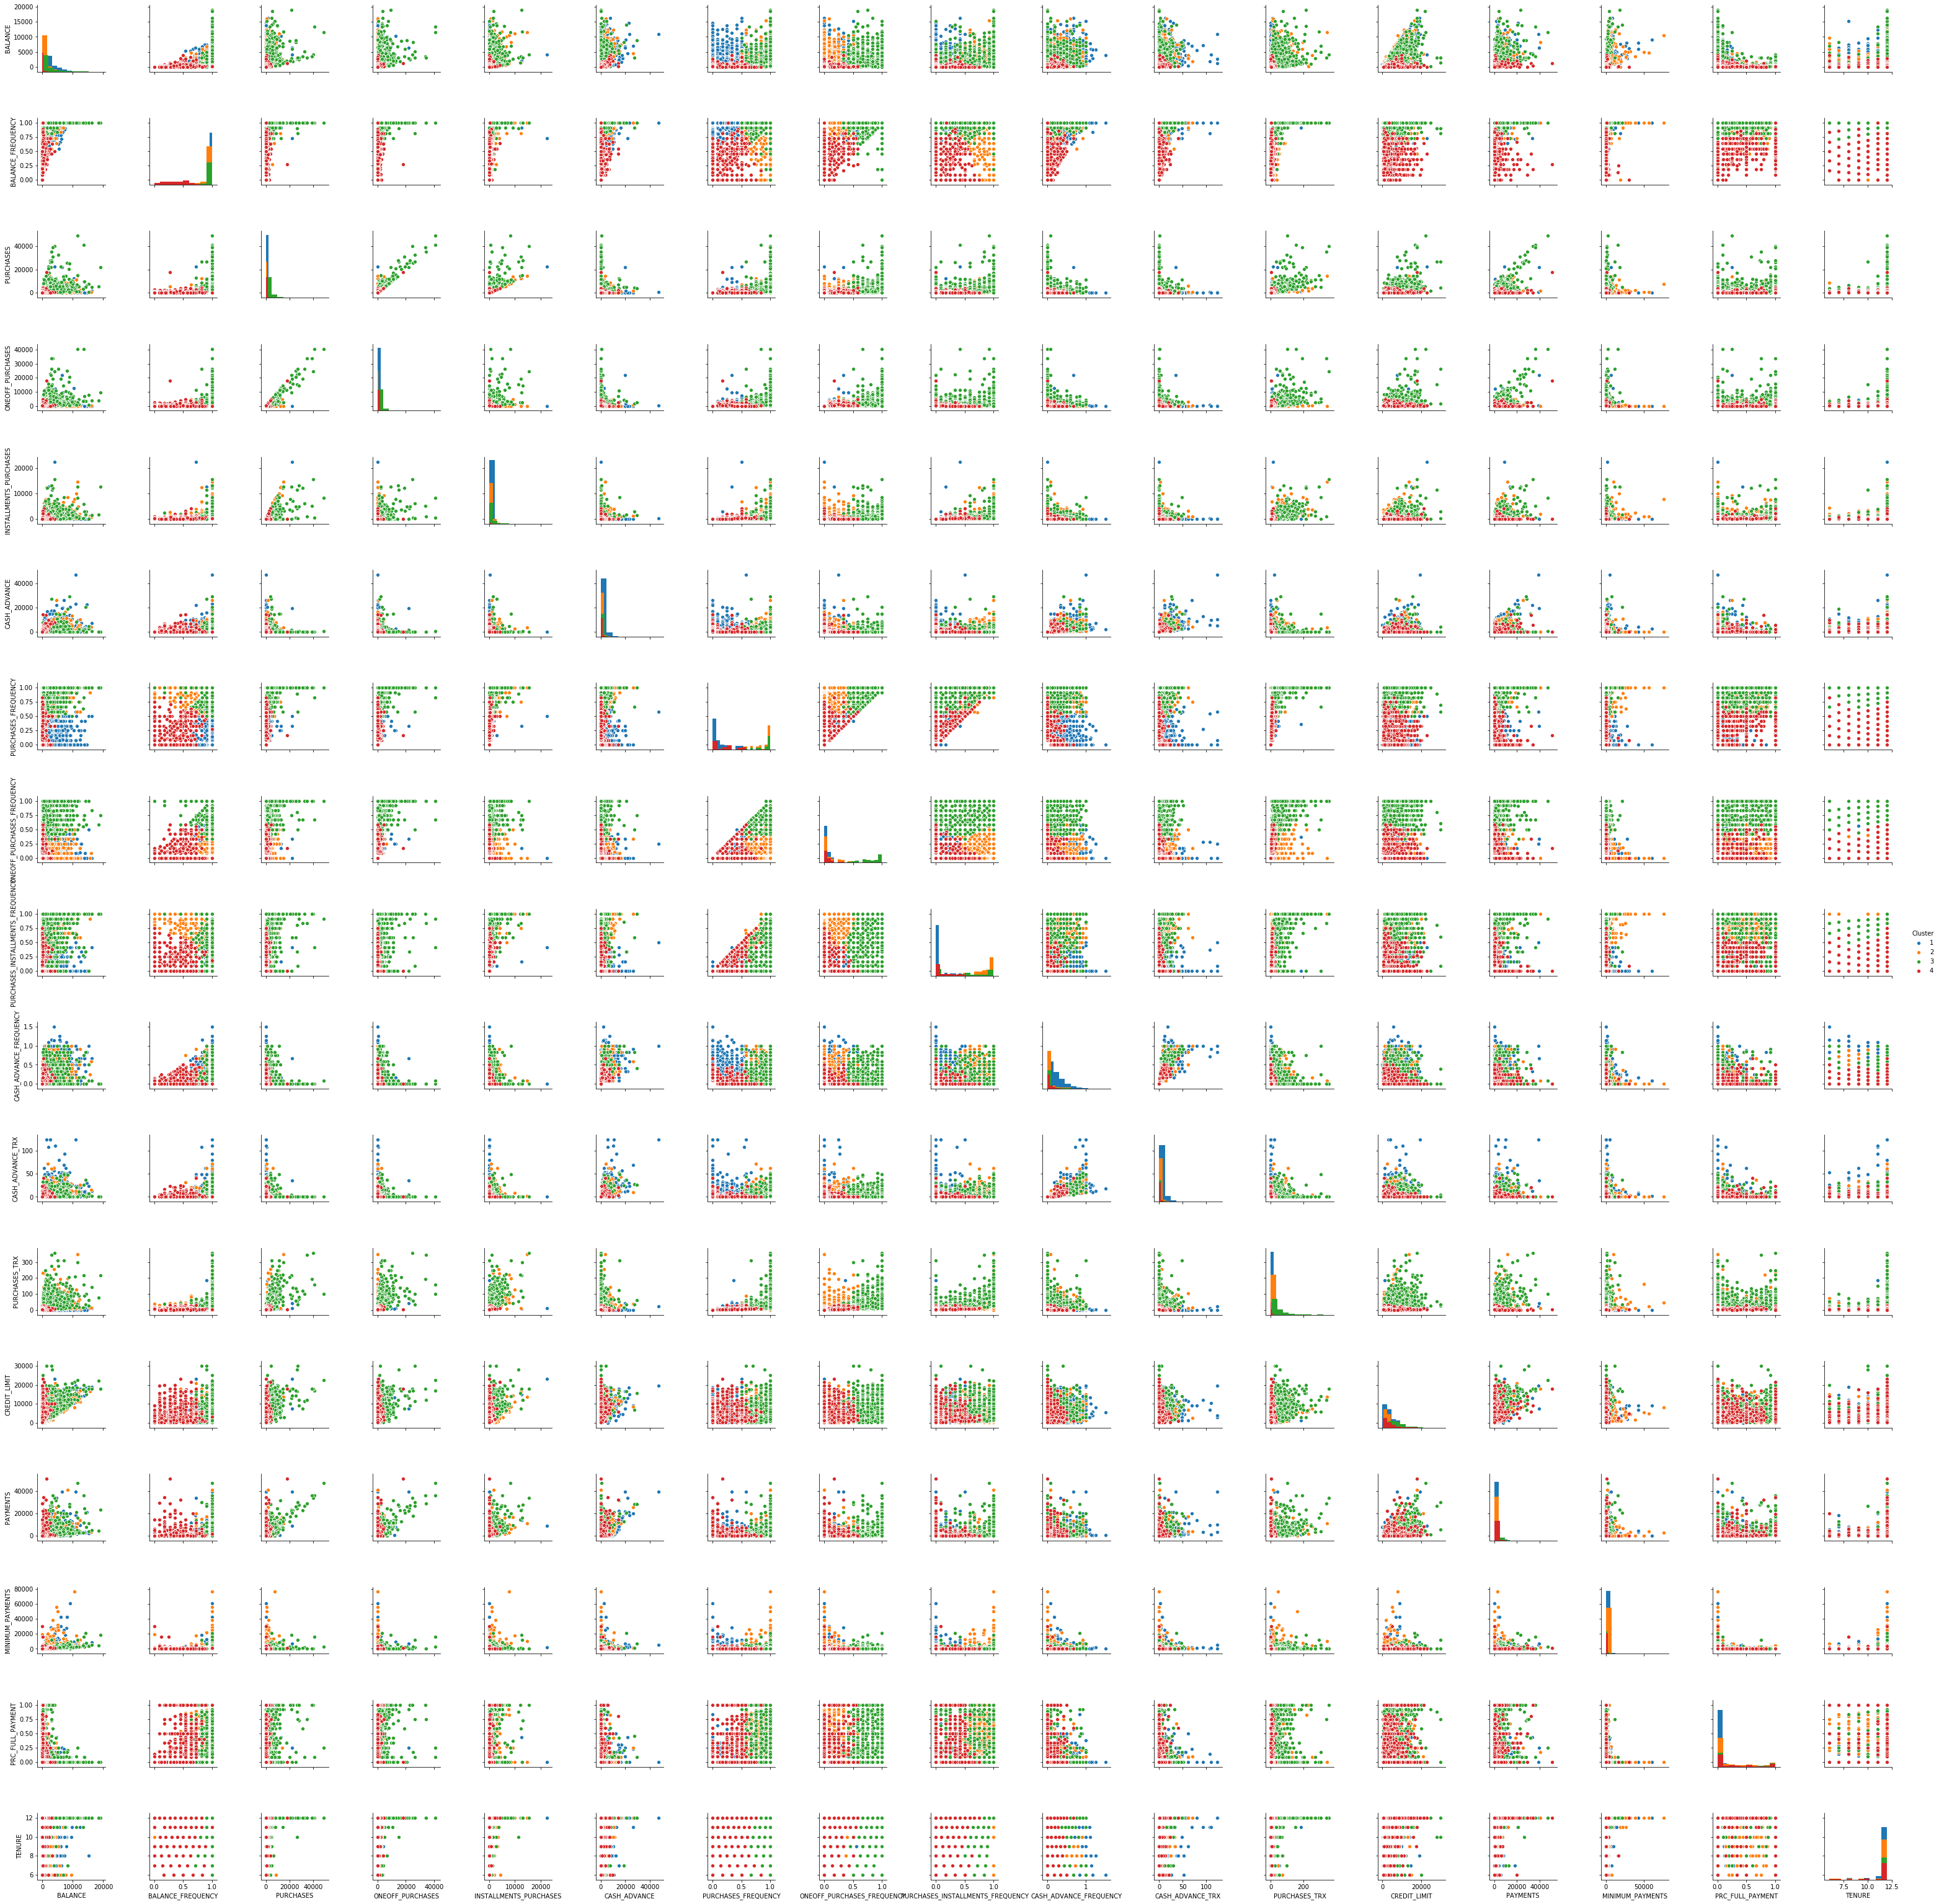

In [62]:
sns.pairplot(df,hue="Cluster",diag_kind="hist")

In [61]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        3  
3        0.000000        627.284787          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

In [71]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","PURCHASES_FREQUENCY","Cluster"]

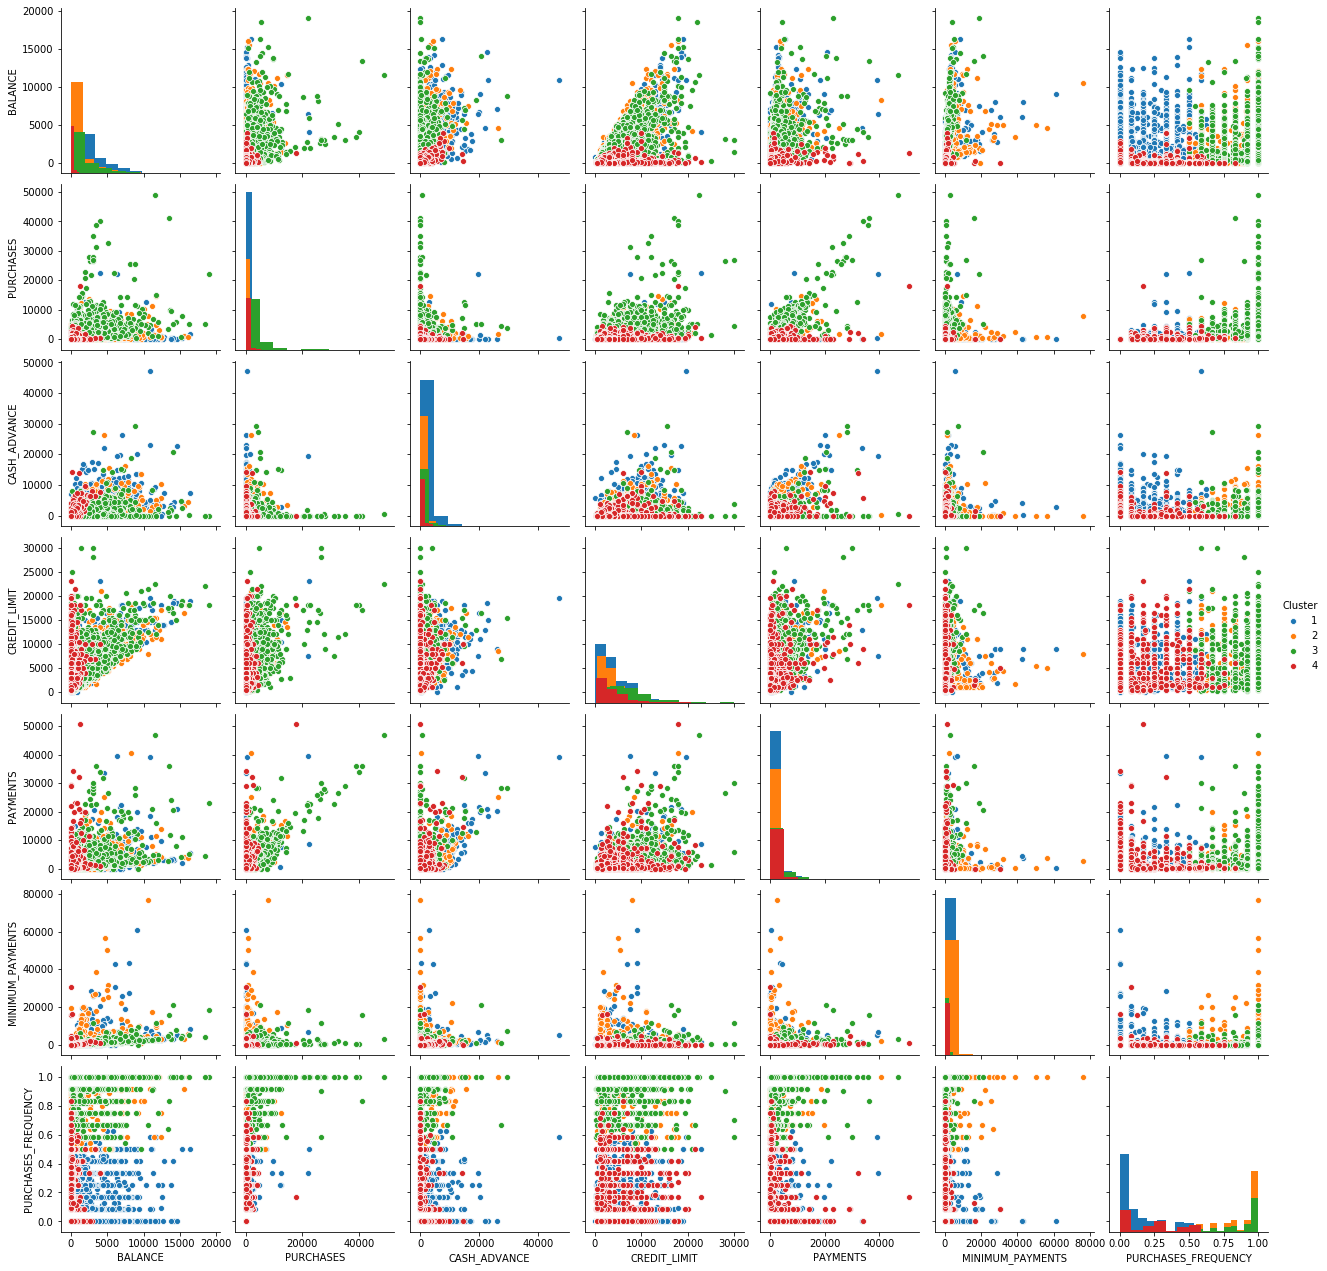

In [72]:
sns.pairplot(df[best_cols],hue="Cluster",diag_kind="hist")

# Inference

We divided this into 4 clusters :
## 1 
The FRUGAL Mentality 
This group comprises of high balance people but very low purchases 
They do take cash advances but their payments are very less
Bank must provide them offers which can help increase their payments and purchase frequency. 
## 2
AVERAGE
This group is the High-end mediocre group and also have install payments (may include students after college/entry level professioanals and thus implying the installments
Although not yet but in the future this group may show promise due to increase in their carrers/relief of investments 
## 3
THE TARGET 
This group is the banks favourite as it has high payments and high purchases.Thi smay include investors/settled profeesionals .
The bank must target this group for offers and other beneifits and help maintain the loyalty.
## 4 
THE LEAST FAVOURITE 
This group conatains with the least balance and payments,purchases.
The bank must focus to give them cheaper and better options to them and offers which act as value for the buck from them .


In [75]:
df["Cluster"].value_counts()

1    3649
2    2687
3    1402
4    1212
Name: Cluster, dtype: int64

In [78]:
df.groupby("Cluster").mean()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
1        2184.725867           0.966243   292.021239        236.587224   
2        1179.575654           0.929710  1091.990584        280.140808   
3        1907.788030           0.974591  3248.394294       2425.655021   
4         153.256122           0.380567   350.388003        235.561881   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
1                     55.597498   1598.975143             0.136549   
2                    812.517168    520.529763             0.883255   
3                    822.739272    650.497493             0.901399   
4                    115.071007    507.900330             0.208995   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
1                          0.087054                          0.050022   
2                          0.102362                          0.832337   
3                          0.805797                          0.491256   
4                          0.073897                          0.127023   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                            
1                      0.225063          5.383393       2.699644   
2                      0.073461          1.792706      21.381838   
3                      0.092193          2.304565      42.955777   
4                      0.050860          1.142739       3.403465   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                                                                  
1         4223.231354  1488.434057       1026.142515          0.022983   
2         3952.725337  1419.406459        957.710535          0.225288   
3         6768.685644  3268.235720        764.951332          0.276413   
4         3880.434543  1389.711193        291.705283          0.246703   

            TENURE  
Cluster             
1        11.494108  
2        11.516561  
3        11.751070  
4        11.318482